# Problem Statement :

an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions.
Customers come in to the store, have sessions/meetings with a personal stylist,
then they can go home and order either on a mobile app or website for the clothes they want.

AiM - The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [62]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt , seaborn as sns
%matplotlib inline

In [63]:
import os 
os.chdir('C:\WorkFile')

In [64]:
#import ecommers store data csv file

In [65]:
customers = pd.read_csv("Ecommerce Customers")

In [66]:
customers.sample(4)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
350,qeaton@savage.com,"27032 Michelle Forest\nMorrowtown, ND 14749",SaddleBrown,33.304337,12.692661,37.333591,3.827376,535.480775
292,edward29@knapp.com,"4029 Gerald Cape\nSouth Laurenborough, SC 1913...",DarkOrange,33.374017,11.143433,35.946399,5.454463,584.218313
278,kenneth27@smith.com,"721 Robert Viaduct Apt. 052\nLake Olivia, MO 9...",DarkGreen,32.607903,13.677246,37.744700,2.871948,530.362469
322,suzanne63@gmail.com,"229 Eric Mountains\nNew Caleb, PA 00396",LightSalmon,33.264632,10.732131,36.145792,4.086566,478.262126


In [67]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


we can seen that there are contain three object and remaining values is float

In [68]:
# we check statstical terms in the data

In [69]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# EDA

In [70]:
# we chech the correlation of features using jointplot

In [71]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [72]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

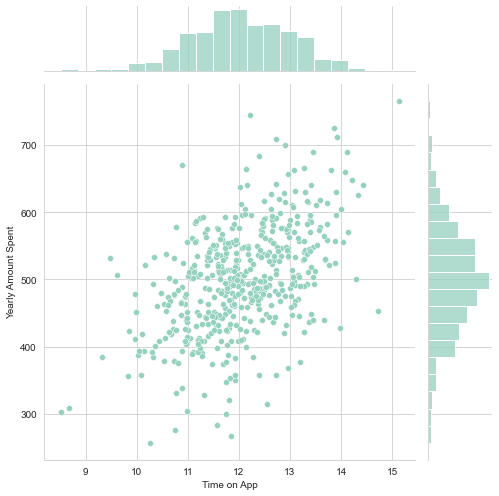

In [73]:
# Time on App vs Yearly Of Membership
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,height=7)

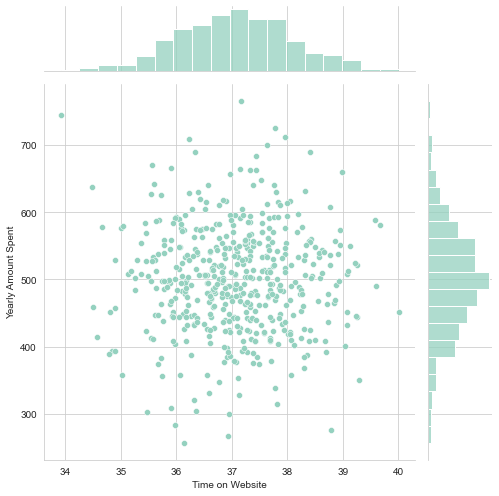

In [74]:
# Time on Website vs Yearly Of Membership

sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,height=7)

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


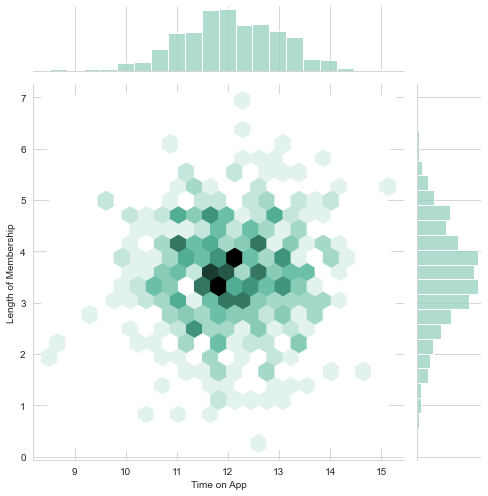

In [75]:
# Time on App and Length of Membership

sns.jointplot('Time on App','Length of Membership',data=customers,height=7,kind='hex')

we see that 2-5 year length of membership customer spent more time on App around 11 min to 15 min

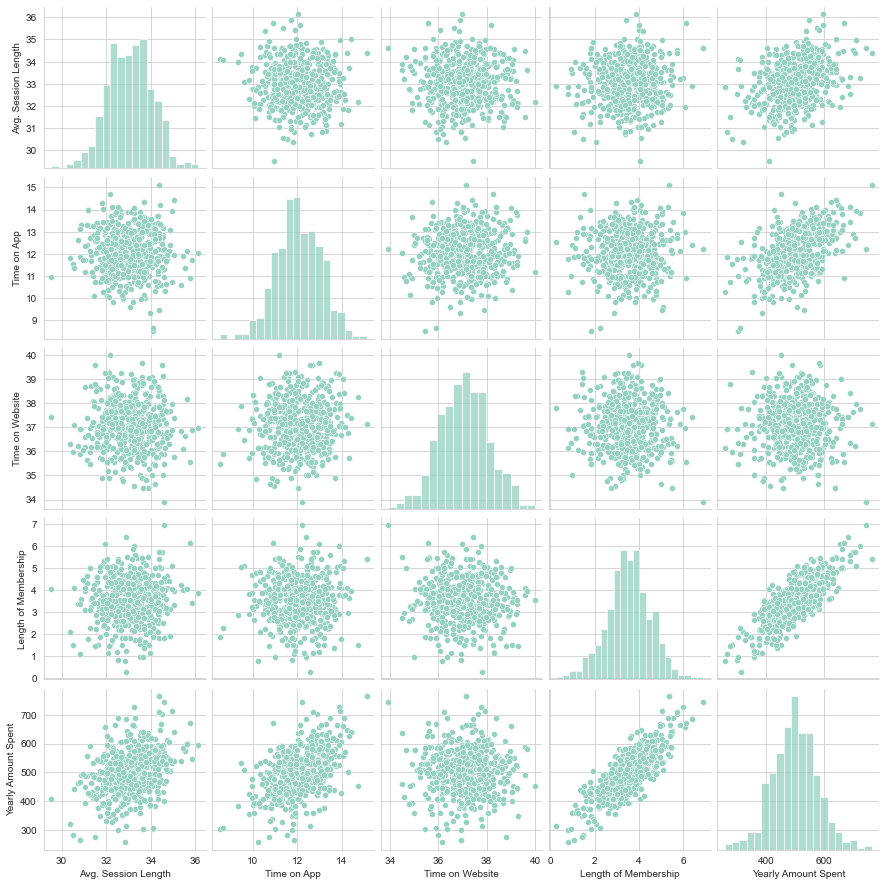

In [76]:
# for explore the types of relationship across the entire dataset
sns.pairplot(customers)

here we seen that  2-6 year of membership customer are 400 to 700 doller spent yearly .. its seen linear relationship.
and corelated to each other.

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Yearly Amount Spent vs. Length of Membership')

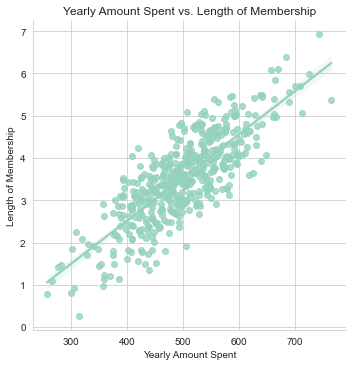

In [78]:
# so we see linear relationship  of Yearly Amount Spent vs. Length of Membership. *

sns.lmplot('Yearly Amount Spent','Length of Membership',data=customers)
plt.title("Yearly Amount Spent vs. Length of Membership")

# Training a Linear Regression Model

Training and Testing Data

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [79]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [84]:
# split the data into trainig and testing sets 
X=customers.iloc[:,3:-1]
print(X)
print('-------------------------------------------')
y=customers['Yearly Amount Spent']

     Avg. Session Length  Time on App  Time on Website  Length of Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497            32.646777    11.499409        38.332576              4.958264
498            33.322501    12.391423        36.840086              2.336485
499            33.715981    12.418808        35.771016              2.735160

[500 rows x 4 columns]
-------------------------------------------


In [85]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [87]:
customers.shape

(500, 8)

In [86]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382
...,...,...,...,...
63,32.789773,11.670066,37.408748,3.414688
326,33.217188,10.999684,38.442767,4.243813
337,31.827979,12.461147,37.428997,2.974737
11,33.879361,11.584783,37.087926,3.713209


In [88]:
x_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861
...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122
346,32.765665,12.506548,35.823467,3.126509
423,33.128693,10.398458,36.683393,3.859818
17,32.338899,12.013195,38.385137,2.420806


so we clearly see that we sucessively split the data
X_train--70%
X_test--30%

In [92]:
lm = LinearRegression()

In [94]:
lm.fit(X_train,y_train)

LinearRegression()

# Modal Evaluation

In [95]:
# # finding intercepy and coeefficeint of each features

In [96]:
lm.intercept_           # Beta_naut

-1047.9327822502391

In [102]:
lm.coef_              # Beta_1 , Beta_2 ....so on

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [103]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['coeffiecint'])

In [104]:
print(coeff_df)

                      coeffiecint
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097


# Predict Test Data

In [108]:
Prediction = lm.predict(x_test)
#Prediction

Text(0, 0.5, 'Pridicted Y')

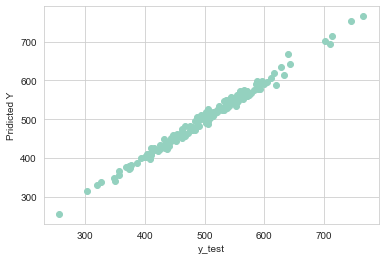

In [111]:
plt.scatter(y_test,Prediction)
plt.xlabel('y_test')
plt.ylabel('Pridicted Y')

the actual value of y is correlated to pricted value of y 
so it seen linear relationship each other 

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

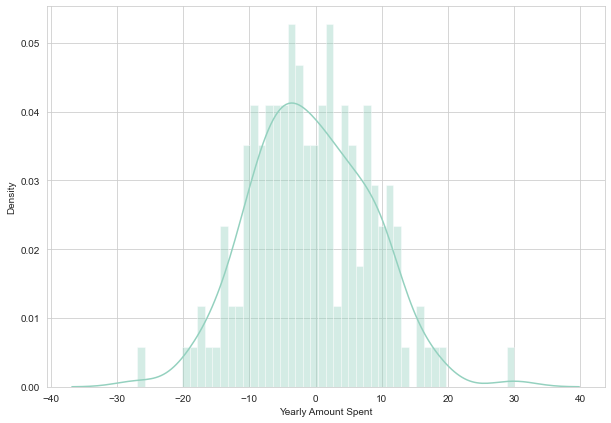

In [114]:
# Residual Histogram
plt.figure(figsize=(10,7))
sns.distplot(y_test - Prediction,bins=50)

# Evaluation Metrics

evaluate our model performance by calculating the residual sum of squares and 
the explained variance score (R^2).

In [116]:
from sklearn import metrics 

In [118]:
MAE = metrics.mean_absolute_error(y_test,Prediction)
print(MAE)

7.228148653430811


In [120]:
MSE = metrics.mean_squared_error(y_test,Prediction)
print(MSE)

79.81305165097385


In [122]:
RMSE = np.sqrt(MSE)
RMSE

8.9338150669786

In [124]:
coeff_df

,coeffiecint
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

    Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

